<a href="https://colab.research.google.com/github/miko-cd/smart_vision/blob/main/3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Эхлээд орчиноо үүсгэх

In [ ]:
!nvidia-smi

Thu Mar  6 07:26:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.25M/6.25M [00:00<00:00, 335MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 57.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 39.3ms
Speed: 10.1ms preprocess, 39.3ms inference, 345.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


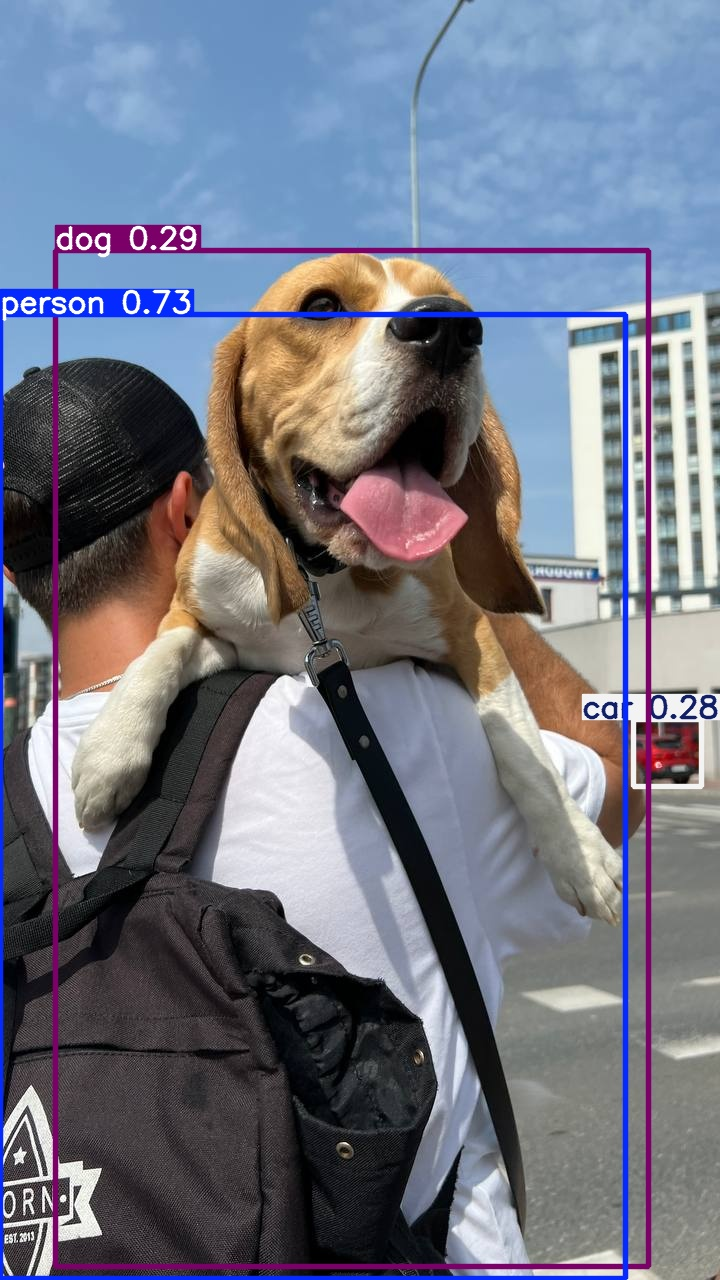

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 49.2ms
Speed: 2.8ms preprocess, 49.2ms inference, 143.6ms postprocess per image at shape (1, 3, 640, 384)


roboflow dataset oruulah heseg

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xUtFt1nIV3m1JnaVSV2V")
project = rf.workspace("yolov8-tzaub").project("tactile_paving_yolov8")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xUtFt1nIV3m1JnaVSV2V")
project = rf.workspace("01-jcx3j").project("sw-0k6f9")
version = project.version(1)
dataset = version.download("coco-segmentation")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to SW-1 in coco-segmentation:: 100%|██████████| 3130/3130 [00:00<00:00, 4555.78it/s]


In [ ]:
!pip install pycocotools

In [ ]:
import json
import os

# Paths
dataset_path = "/content/SW-1"
sets = ["train", "valid", "test"]

for set_name in sets:
    json_path = f"{dataset_path}/{set_name}/_annotations.coco.json"
    images_dir = f"{dataset_path}/{set_name}/images"
    labels_dir = f"{dataset_path}/{set_name}/labels"

    # Ensure labels directory exists
    os.makedirs(labels_dir, exist_ok=True)

    # Load COCO JSON
    with open(json_path, 'r') as f:
        data = json.load(f)

    # Correctly map image filenames to their IDs
    image_id_to_name = {img["id"]: img["file_name"] for img in data["images"]}
    image_id_to_size = {img["id"]: (img["width"], img["height"]) for img in data["images"]}

    for ann in data["annotations"]:
        img_id = ann["image_id"]
        if img_id not in image_id_to_name:
            continue  # Skip if image_id not found

        # Preserve full filename without modification
        img_name = os.path.splitext(image_id_to_name[img_id])[0]
        label_file = os.path.join(labels_dir, f"{img_name}.txt")

        x, y, w, h = ann["bbox"]
        img_width, img_height = image_id_to_size[img_id]

        # Convert to YOLO format
        x_center, y_center = (x + w / 2) / img_width, (y + h / 2) / img_height
        w, h = w / img_width, h / img_height
        category_id = ann["category_id"] - 1  # Convert to 0-based indexing

        # Write to file
        with open(label_file, "a") as f:
            f.write(f"{category_id} {x_center} {y_center} {w} {h}\n")

print("✅ COCO to YOLO conversion complete with correct filenames!")


✅ COCO to YOLO conversion complete!


In [ ]:
mkdir -p /content/SW-1/test/images

In [ ]:
mv /content/SW-1/test/*.jpg /content/SW-1/test/images/

In [ ]:
import os
os.listdir("/content/SW-1/train/labels")

['J_055.txt',
 '466.txt',
 'M080.txt',
 'E_034.txt',
 'N214.txt',
 'D_012.txt',
 '4.txt',
 'J_060.txt',
 'N238.txt',
 'G_064.txt',
 '452.txt',
 'N018.txt',
 'I_001.txt',
 '50.txt',
 'E_108.txt',
 'G_119.txt',
 'L015.txt',
 'B_023.txt',
 'N198.txt',
 'H_009.txt',
 'C_007.txt',
 'N172.txt',
 'L055.txt',
 'P007.txt',
 '450.txt',
 '36.txt',
 '43.txt',
 '348.txt',
 'N092.txt',
 '461.txt',
 'E_079.txt',
 'N257.txt',
 'E_035.txt',
 '8.txt',
 'H_051.txt',
 'E_004.txt',
 '84.txt',
 '493.txt',
 '351.txt',
 '420.txt',
 '358.txt',
 'G_081.txt',
 'D_001.txt',
 'E_112.txt',
 'N236.txt',
 'P017.txt',
 'L066.txt',
 'D_014.txt',
 'G_012.txt',
 'N222.txt',
 'J_119.txt',
 '487.txt',
 'P047.txt',
 'L007.txt',
 'J_112.txt',
 'N126.txt',
 'B_031.txt',
 'J_059.txt',
 'A_023.txt',
 'N031.txt',
 'N167.txt',
 '458.txt',
 'D_011.txt',
 '406.txt',
 'J_101.txt',
 '475.txt',
 'J_035.txt',
 '439.txt',
 'B_025.txt',
 'N212.txt',
 '489.txt',
 'J_005.txt',
 'P066.txt',
 'B_015.txt',
 'I_013.txt',
 'G_019.txt',
 'H_015.

In [ ]:
import os

# Зураг ба аннотаци файлын замууд
image_dir = "/content/SW-1/train/images"
label_dir = "/content/SW-1/train/labels"

# Бүх файлуудыг авах
image_files = {os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(".jpg")}
label_files = {os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith(".txt")}

# Зураг нь байгаа боловч аннотаци байхгүй файлууд
missing_labels = image_files - label_files
# Аннотаци байгаа боловч зураг байхгүй файлууд
missing_images = label_files - image_files

print("Аннотаци байхгүй зургууд:", missing_labels)
print("Зураг байхгүй аннотаци:", missing_images)


Аннотаци байхгүй зургууд: {'G_002.rf.8f42d2a6f753daf12cd3221b50da2ce8', '347.rf.bd41dfe625f09e6c76f1853ae8006229', 'N164.rf.3c64027325b34d4a3ce3031dea40bc9b', 'J_012.rf.08b8abc2b5070495a3589f68ec33642b', 'A_009.rf.bf51e8fdaacc83b46404745c42254a10', '445.rf.36a6c9fb107bf95f0596bb0b0c39e481', 'N248.rf.90a15c440f02067c21f1c58fcfb5bde6', 'F_017.rf.7c330280297263b0d80c76d6054d64ab', 'E_087.rf.85357cbe584fc2418ca6494d7ff1ab1a', 'E_052.rf.8daa9e0e91b481ea4dece7438c5e3ed0', 'G_006.rf.443f7b34604fbc0d583bb3cb8d89feaa', 'G_098.rf.081f4a09953790a7dedc1c499d122157', 'J_166.rf.52992a0da77e8d120f98132530140307', '52.rf.543f2152f5fb7ff2270bd9ce8c5bafc9', 'I_020.rf.b85668d1e85aae2e619d5517d2729d3e', 'A_029.rf.3b531ee5b62111cf71fcf1497db4b61f', '456.rf.4eb7c23165c515ae6ee312a8f365bc8a', 'F_003.rf.87c3ebfffcbfa2422f53294d37cd5ab3', 'B_062.rf.4c5b4418abb9dfa399a95ff70bfd04bd', 'A_049.rf.468d3705c8066a6efc792b767c1c6a4d', 'E_115.rf.ad7ff3a56904fc6fe606da9cf7857292', 'A_033.rf.46de71c9c86ce73c988c10ec5b886

In [ ]:
data_yaml = """\
train: /content/SW-1/train/images
val: /content/SW-1/valid/images
test: /content/SW-1/test/images

nc: 2
names: ["sidewalk", "Sidewalk"]
"""

with open("/content/SW-1/data.yaml", "w") as f:
    f.write(data_yaml)

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17270, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 17270 (delta 0), reused 0 (delta 0), pack-reused 17269 (from 2)
Receiving objects: 100% (17270/17270), 16.10 MiB | 21.24 MiB/s, done.
Resolving deltas: 100% (11855/11855), done.


In [ ]:
!cd yolov5 && python3 train.py --img 640 --batch 16 --epochs 100 --data /content/SW-1/data.yaml --weights yolov5s.pt --cache

2025-02-26 04:44:43.924196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740545084.251026    1752 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740545084.334518    1752 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/SW-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, na

In [ ]:
from ultralytics import YOLO
import torch
import os
HOME = os.getcwd()

# Load the pre-trained YOLOv8 model
model = YOLO(f'{HOME}/yolov8n-seg.pt')


# Train the model
results = model.train(
    data="/content/SW-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.84 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=/content/yolov8n-seg.pt, data=/content/SW-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning /content/SW-1/train/labels.cache... 0 images, 2881 backgrounds, 0 corrupt: 100%|██████████| 2881/2881 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/SW-1/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/SW-1/valid/labels.cache... 0 images, 181 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<?, ?it/s]

WARNING ⚠️ No labels found in /content/SW-1/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


Plotting labels to runs/segment/train5/labels.jpg... 
zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.33G          0          0      89.79          0          0        640: 100%|██████████| 181/181 [00:52<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.66it/s]

                   all        181          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.77G          0          0      40.17          0          0        640: 100%|██████████| 181/181 [00:49<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all        181          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.79G          0          0      8.952          0          0        640: 100%|██████████| 181/181 [00:50<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  5.21it/s]

                   all        181          0          0          0          0          0          0          0          0          0
WARNING ⚠️ no labels found in segment set, can not compute metrics without labels



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.76G          0          0      0.843          0          0        640: 100%|██████████| 181/181 [00:48<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]


RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Tactile_paving_yolov8.zip -d /content/dataset

unzip:  cannot find or open /content/drive/MyDrive/Tactile_paving_yolov8.zip, /content/drive/MyDrive/Tactile_paving_yolov8.zip.zip or /content/drive/MyDrive/Tactile_paving_yolov8.zip.ZIP.


Install YOLOv8 and Dependencies

In [ ]:
!pip install ultralytics roboflow
from ultralytics import YOLO

In [ ]:
!cat /content/SW-1/data.yaml

train: /content/SW-1/train
val: /content/SW-1/valid
test: /content/SW-1/test

nc: 2
names: ["sidewalk", "Sidewalk"]


In [ ]:
with open("/content/Tactile_paving_yolov8-2/data.yaml", "w") as f:
    f.write("""names:
  0: Tactile-paving
path: /content/Tactile_paving_yolov8-2
train: train/images
val: valid/images
test: test/images
""")

**Train Your Model , This will train YOLOv8 on your tactile paving dataset.**

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')  # You can use "yolov8m.pt" or "yolov8s.pt" for better accuracy

results = model.train(
    data="/content/Tactile_paving_yolov8-2/data.yaml",  # Adjust path if needed
    epochs=20,  # Increase if needed
    imgsz=640,
    batch=16,
    device=0  # Use GPU
)

New https://pypi.org/project/ultralytics/8.3.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=/content/Tactile_paving_yolov8-2/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=N

train: Scanning /content/Tactile_paving_yolov8-2/train/labels.cache... 175 images, 3 backgrounds, 25 corrupt: 100%|██████████| 175/175 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Tactile_paving_yolov8-2/train/images/0029_jpg.rf.14a7c09439e3d320a78032702bac4238.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [          1]
train: WARNING ⚠️ /content/Tactile_paving_yolov8-2/train/images/0043_jpg.rf.a32d89f100a0eaba4da52af6164de15c.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0566]
train: WARNING ⚠️ /content/Tactile_paving_yolov8-2/train/images/0045_jpg.rf.ebf29746ffdc5dca2a68749a102fa2a6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0345]
train: WARNING ⚠️ /content/Tactile_paving_yolov8-2/train/images/0046_jpg.rf.b2b98f7ae120d75ce914daa0e2f09195.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1449]
train: WARNING ⚠️ /content/Tactile_paving_yolov8-2/train/images/0047_jpg.rf.4f457e63e2198c564284daedb967b071.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [   

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Tactile_paving_yolov8-2/valid/labels.cache... 50 images, 1 backgrounds, 6 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0056_jpg.rf.65ef74457d6fc59af59d2498b4f826ac.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0045]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0073_jpg.rf.ec89d57bb67cf0b53a8cd5a376458cc0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0234      1.2396]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0100_jpg.rf.ce3e8eea0be7a2bcb6a05e7ff83c0407.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0573]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0103_jpg.rf.2639a40b0532df3ae394c495a702b882.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0178]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0126_jpg.rf.70275a1dac1bf95bbeabb8af9f24b293.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [ 

Plotting labels to runs/detect/train2/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)


Exception in thread Thread-11 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_s

KeyboardInterrupt: 

Evaluate the Model, Check mAP (mean Average Precision) to see how well your model performs.

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:1

val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0056_jpg.rf.65ef74457d6fc59af59d2498b4f826ac.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0045]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0073_jpg.rf.ec89d57bb67cf0b53a8cd5a376458cc0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0234      1.2396]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0100_jpg.rf.ce3e8eea0be7a2bcb6a05e7ff83c0407.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0573]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0103_jpg.rf.2639a40b0532df3ae394c495a702b882.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0178]
val: WARNING ⚠️ /content/Tactile_paving_yolov8-2/valid/images/0126_jpg.rf.70275a1dac1bf95bbeabb8af9f24b293.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [ 


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]


                   all         44         54      0.788      0.758       0.74      0.503
Speed: 0.3ms preprocess, 14.3ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to runs/detect/train42
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f3ebdd4ce10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['LC_ALL'] = 'C.UTF-8'
os.environ['LANG'] = 'C.UTF-8'

In [ ]:
# Copy model folder to Google Drive. /content/runs/detect/train
!cp -r /content/runs/detect/train /content/drive/MyDrive/trian_previous

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
from shutil import copytree
copytree('/content/runs/detect/train', '/content/drive/MyDrive/train', dirs_exist_ok=True)

'/content/drive/MyDrive/train'

Run Inference on Test Images

results = model("/content/Tactile_paving_yolov8-2/test/images/0021_jpg.rf.106332e023f2598700fe950665698c2b.jpg", show=True, save=True)

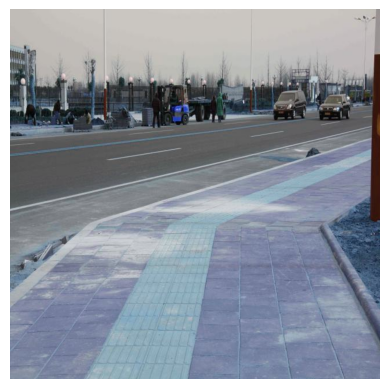

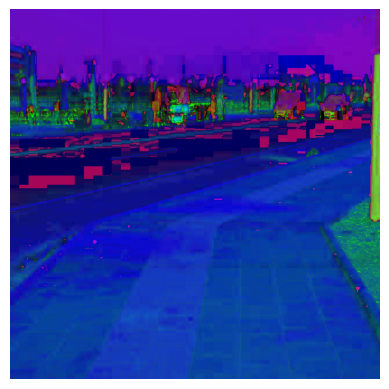

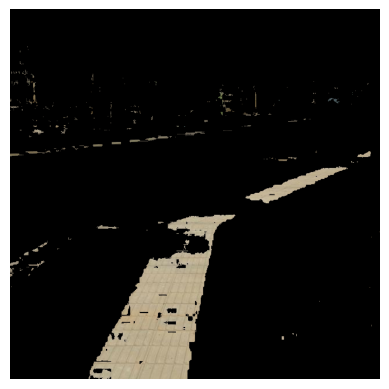

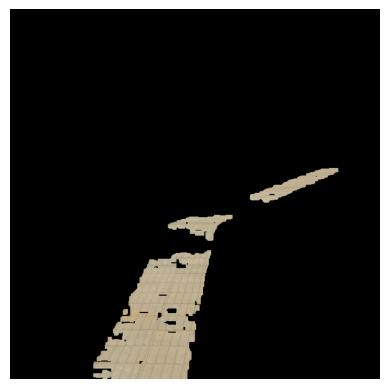

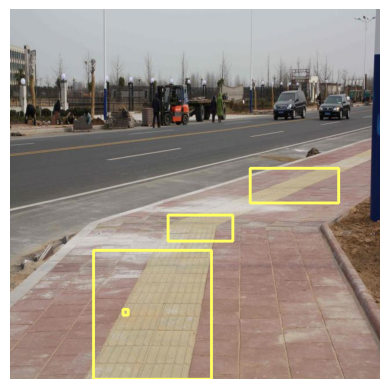

(640, 640, 3)
Saved: /content/Image.txt


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
# /content/Tactile_paving_yolov8-2/test/images/0021_jpg.rf.106332e023f2598700fe950665698c2b.jpg
image_path = "/content/Tactile_paving_yolov8-2/test/images/0023_jpg.rf.67298fe3a432e34bdd1c5e0733b0c009.jpg"
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis("off")
plt.show()

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(image_hsv)
plt.axis("off")
plt.show()

lower_yellow = (18, 44, 90)
upper_yellow = (100, 225, 255)

mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)

yellow_segment = cv2.bitwise_and(image, image, mask=mask)

yellow_segment_rgb = cv2.cvtColor(yellow_segment, cv2.COLOR_BGR2RGB)

plt.imshow(yellow_segment_rgb)
plt.axis("off")
plt.show()

import numpy as np

kernel = np.ones((7, 7), np.uint8)

cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

yellow_segment_cleaned = cv2.bitwise_and(image, image, mask=cleaned_mask)

yellow_segment_cleaned_rgb = cv2.cvtColor(yellow_segment_cleaned, cv2.COLOR_BGR2RGB)
plt.imshow(yellow_segment_cleaned_rgb)
plt.axis("off")
plt.show()

contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 255, 100), 3)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()

img_height, img_width, image_layer = image.shape

print(image.shape)

label_path = "/content/"
os.makedirs(label_path, exist_ok=True)

label_file = os.path.join(label_path, "Image.txt")

with open(label_file, "w") as f:
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)

        center_x = (x + w / 2) / img_width
        center_y = (y + h / 2) / img_height
        norm_w = w / img_width
        norm_h = h / img_height

        f.write(f"0 {center_x} {center_y} {norm_w} {norm_h}\n")

print(f"Saved: {label_file}")

In [ ]:
import cv2
import numpy as np
import shutil
import os
from sklearn.model_selection import train_test_split

def image_dataset(dataset_folder, image_folder):
    subfolders = ['train', 'val', 'test']
    splits = ['images', 'labels']

    dataset_path = os.path.join(dataset_folder, 'dataset')
    os.makedirs(dataset_path, exist_ok=True)

    for split in subfolders:
        split_path = os.path.join(dataset_path, split)
        os.makedirs(split_path, exist_ok=True)
        for subfolder in splits:
            os.makedirs(os.path.join(split_path, subfolder), exist_ok=True)

    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(image_files) == 0:
        raise ValueError("No image files found in the provided image folder.")

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        lower_yellow = (0, 50, 30)
        upper_yellow = (150, 225, 255)

        mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
        yellow_segment = cv2.bitwise_and(image, image, mask=mask)

        kernel = np.ones((20, 20), np.uint8)
        cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        yellow_segment_cleaned = cv2.bitwise_and(image, image, mask=cleaned_mask)
        contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        img_height, img_width, image_layer = image.shape
        label_file_path = os.path.join(image_folder, os.path.splitext(image_file)[0] + ".txt")

        with open(label_file_path, "w") as f:
            for cnt in contours:
                x, y, w, h = cv2.boundingRect(cnt)

                center_x = (x + w / 2) / img_width
                center_y = (y + h / 2) / img_height
                norm_w = w / img_width
                norm_h = h / img_height

                f.write(f"0 {center_x} {center_y} {norm_w} {norm_h}\n")

        print(f"Saved: {label_file_path}")

    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    def copy_files(file_list, split):
        for file_name in file_list:
            image_src = os.path.join(image_folder, file_name)
            label_src = os.path.join(image_folder, os.path.splitext(file_name)[0] + ".txt")

            image_dst = os.path.join(dataset_path, split, 'images', file_name)
            label_dst = os.path.join(dataset_path, split, 'labels', os.path.splitext(file_name)[0] + ".txt")

            shutil.copy(image_src, image_dst)
            shutil.copy(label_src, label_dst)

    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

In [ ]:
import cv2
import numpy as np
import shutil
import os
from sklearn.model_selection import train_test_split

def image_dataset(dataset_folder, image_folder):
    subfolders = ['train', 'val', 'test']
    splits = ['images', 'labels']

    dataset_path = os.path.join(dataset_folder, 'dataset')
    os.makedirs(dataset_path, exist_ok=True)

    for split in subfolders:
        split_path = os.path.join(dataset_path, split)
        os.makedirs(split_path, exist_ok=True)
        for subfolder in splits:
            os.makedirs(os.path.join(split_path, subfolder), exist_ok=True)

    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if len(image_files) == 0:
        raise ValueError("No image files found in the provided image folder.")

    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)

        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        lower_yellow = (0, 50, 30)
        upper_yellow = (150, 225, 255)

        mask = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
        yellow_segment = cv2.bitwise_and(image, image, mask=mask)

        kernel = np.ones((20, 20), np.uint8)
        cleaned_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

        yellow_segment_cleaned = cv2.bitwise_and(image, image, mask=cleaned_mask)
        contours, _ = cv2.findContours(cleaned_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        img_height, img_width, image_layer = image.shape
        label_file_path = os.path.join(image_folder, os.path.splitext(image_file)[0] + ".txt")

        with open(label_file_path, "w") as f:
            for cnt in contours:
                x, y, w, h = cv2.boundingRect(cnt)

                center_x = (x + w / 2) / img_width
                center_y = (y + h / 2) / img_height
                norm_w = w / img_width
                norm_h = h / img_height

                f.write(f"0 {center_x} {center_y} {norm_w} {norm_h}\n")

        print(f"Saved: {label_file_path}")

    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)
    train_files, val_files = train_test_split(train_files, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

    def copy_files(file_list, split):
        for file_name in file_list:
            image_src = os.path.join(image_folder, file_name)
            label_src = os.path.join(image_folder, os.path.splitext(file_name)[0] + ".txt")

            image_dst = os.path.join(dataset_path, split, 'images', file_name)
            label_dst = os.path.join(dataset_path, split, 'labels', os.path.splitext(file_name)[0] + ".txt")

            shutil.copy(image_src, image_dst)
            shutil.copy(label_src, label_dst)

    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

In [ ]:
ls

dog.jpeg  runs/  Tactile_paving_yolov8-2/  yolov8n.pt


In [ ]:
dataset_folder = '/content/runs/'
image_folder = '/content/Tactile_paving_yolov8-2/test/images'
image_dataset(dataset_folder, image_folder)

Saved: /content/Tactile_paving_yolov8-2/test/images/0023_jpg.rf.67298fe3a432e34bdd1c5e0733b0c009.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0078_jpg.rf.8e6d303a7e6dfc611a1ecf9bb64927e5.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0208_jpg.rf.c8063be13c0db4b384dd5fc0c55280f0.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0163_jpg.rf.7662e6311dd516c0b770f83c9c4aa6b4.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0139_jpg.rf.e8ea059bdd263d397f583099b4ac73f2.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0152_jpg.rf.a383bbf94869b3271600774f4b949315.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0098_jpg.rf.25bd72bb0b435007f1796cd475b2b3a1.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0237_jpg.rf.eafa60172633e8b4ba9aa842a88f9931.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0249_jpg.rf.989b66e913d72e308a28f1451962b86e.txt
Saved: /content/Tactile_paving_yolov8-2/test/images/0072_jpg.rf.0d1347649747a9d4604f61c4c29

In [ ]:
import os

def create_dataset_yaml(dataset_folder):
    dataset_yaml = f"""train: {os.path.join(dataset_folder, 'train/images')}
val: {os.path.join(dataset_folder, 'val/images')}
test: {os.path.join(dataset_folder, 'test/images')}

nc: 1
names: ["yellow_roadblock"]
"""

    yaml_file_path = os.path.join(dataset_folder, "dataset.yaml")

    with open(yaml_file_path, "w") as f:
        f.write(dataset_yaml)

    print(f"dataset.yaml {yaml_file_path}")